In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# **GTEx dataset**

**Firstly**, we load the GTEx dataset with expression levels of genes, transform patients ID (because the file with information about patients contain the short version of ID), and plot the distribution of all values.

In [2]:
df1 = pd.read_csv('Original_Data/GTEx_Lung.csv')
df1.shape # (54670, 579)
df1.tail(3)

,ID,GTEX-111CU-0326-SM-5GZXO,GTEX-111FC-1126-SM-5GZWU,GTEX-111VG-0726-SM-5GIDC,GTEX-111YS-0626-SM-5GZXV,GTEX-1122O-0126-SM-5GICA,GTEX-1128S-0726-SM-5N9D6,GTEX-117YW-0526-SM-5H11C,GTEX-117YX-1326-SM-5H125,GTEX-11DXX-0626-SM-5Q5AG,...,GTEX-ZVZQ-1526-SM-5N9G6,GTEX-ZXG5-0826-SM-5GID6,GTEX-ZY6K-0326-SM-5SIBB,GTEX-ZYFG-0226-SM-5GIDT,GTEX-ZYT6-0526-SM-5GIEA,GTEX-ZYVF-1726-SM-5E443,GTEX-ZYW4-1526-SM-5SIBA,GTEX-ZYY3-0926-SM-5E454,GTEX-ZZPT-1326-SM-5E43H,GTEX-ZZPU-0526-SM-5E44U
54667,ZYXP1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
54668,ZZEF1,12.7239,12.0307,12.7121,12.9052,12.8844,12.6423,12.7781,12.7595,12.6427,...,12.8648,11.9582,12.8380,12.4979,12.3764,12.5294,12.8723,12.2411,12.5294,12.8335
54669,ZZZ3,10.9293,10.9024,10.0265,10.8114,10.4273,10.1774,10.3083,10.9031,10.8819,...,10.7347,11.4120,10.7557,10.2597,10.9809,10.9687,10.6733,10.1972,11.0782,10.8634


In [3]:
df1.columns = df1.columns.str.split('-').str[:2].str.join('-')
df1.head(3)

,ID,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-117YW,GTEX-117YX,GTEX-11DXX,...,GTEX-ZVZQ,GTEX-ZXG5,GTEX-ZY6K,GTEX-ZYFG,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYW4,GTEX-ZYY3,GTEX-ZZPT,GTEX-ZZPU
0,5_8S_rRNA,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0
1,5S_rRNA,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.3333,0.0,0.0000,0.0000,0.0,0.3333,0.3333,0.0
2,7SK,0.0,0.4308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2642,0.2642,0.1667,0.0,0.1667,0.4308,0.0,0.0000,0.0000,0.0


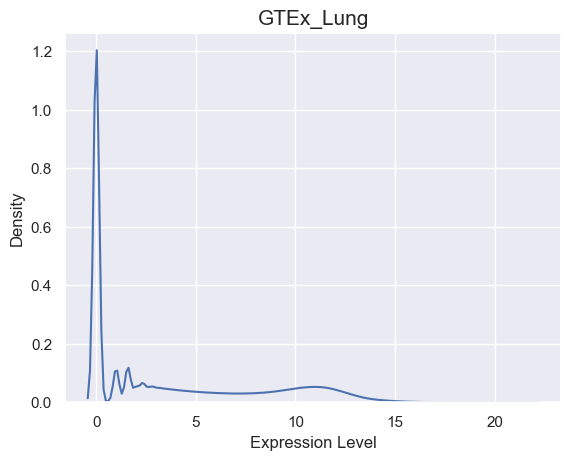

In [4]:
GTE = sns.kdeplot(np.array(df1.iloc[:, 1:]).flatten(), legend=False)
GTE.set_title('GTEx_Lung', fontsize=15)
GTE.set(xlabel='Expression Level', ylabel='Density')
fig = GTE.get_figure()
GTE;

**Secondly**, we load the GTEx_patients dataset with information about patients, view the distributions of Sex and Age, replace the ranges of Age to average values, remove the column 'DTHHRDY', because we have no information about this feature, and it is missing in the TCGA dataset.

In [4]:
df1_ = pd.read_csv('Original_Data/GTEx_patients.csv')
df1_.shape # (980, 4)
df1_.tail(3)

,SUBJID,SEX,AGE,DTHHRDY
977,GTEX-ZZPT,1,50-59,4.0
978,GTEX-ZZPU,2,50-59,0.0
979,K-562,2,50-59,NaN


In [11]:
df1_.SEX.value_counts() # 1-male (653), 2-female (327)

SEX
1    653
2    327
Name: count, dtype: int64

In [7]:
df1_.AGE.value_counts()

AGE
60-69    317
50-59    315
40-49    153
20-29     84
30-39     78
70-79     33
Name: count, dtype: int64

In [5]:
df1_.AGE.replace({'20-29': 25, '30-39': 35, '40-49': 45, '50-59': 55, '60-69': 65, '70-79': 75}, inplace=True)
df1_.head(3)

,SUBJID,SEX,AGE,DTHHRDY
0,GTEX-1117F,2,65,4.0
1,GTEX-111CU,1,55,0.0
2,GTEX-111FC,1,65,1.0


In [6]:
df1_.DTHHRDY.isnull().sum() # 19
df1_ = df1_.drop('DTHHRDY', axis=1)

**Thirdly**, we merge these two datasets for future investigations, check NAN and zero values.

In [75]:
df11_ = pd.concat([df1.set_index('ID').T, df1_.set_index('SUBJID')], axis=1, join="inner")
df11_.tail() # (578, 54672)

,5_8S_rRNA,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,...,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3,SEX,AGE
GTEX-ZYVF,0.0,0.0000,0.4308,8.4676,7.9542,3.4594,19.0532,9.5736,5.7004,0.0,...,10.2900,2.8074,0.0,10.6321,14.5359,0.0,12.5294,10.9687,2,55
GTEX-ZYW4,0.0,0.0000,0.0000,8.1033,6.8074,3.4594,19.3598,9.6528,4.1699,0.0,...,10.4949,3.3219,0.0,11.2825,15.2277,0.0,12.8723,10.6733,1,65
GTEX-ZYY3,0.0,0.3333,0.0000,8.5887,6.3576,2.3219,18.9802,8.4553,4.8074,0.0,...,9.6330,2.3219,0.0,10.5527,14.7406,0.0,12.2411,10.1972,2,65
GTEX-ZZPT,0.0,0.3333,0.0000,8.9278,6.6724,2.8074,17.9545,8.5157,5.7814,0.0,...,11.1144,3.5850,0.0,11.1948,14.6073,0.0,12.5294,11.0782,1,55
GTEX-ZZPU,0.0,0.0000,0.0000,8.7004,7.4429,2.5850,17.9440,8.0000,5.2095,0.0,...,10.9469,2.8074,0.0,10.9114,14.5659,0.0,12.8335,10.8634,2,55


In [60]:
len(df11_.columns[df11_.isna().any()].tolist()) # 0

0

In [61]:
GTEx_columns_with_all_zeros = df11_.columns[(df11_ == 0.0).all()].tolist()
len(GTEx_columns_with_all_zeros) # 1845

1845

#### Research of differences between genes distributions on Sex

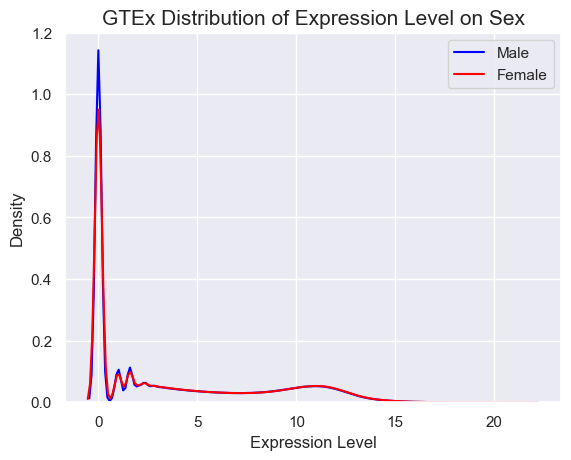

In [62]:
colors = ['blue', 'red']
sexes = ['Male', 'Female']
for sex in [1, 2]:
    ds = np.array(df11_[df11_.SEX == sex].iloc[:, :-2]).flatten()
    Sex_GTE = sns.kdeplot(ds, color=colors[sex-1], label=sexes[sex-1]);
Sex_GTE.set_title('GTEx Distribution of Expression Level on Sex', fontsize=15)
Sex_GTE.set(xlabel='Expression Level', ylabel='Density')
plt.legend();
plt.show();

#### Research of differences between genes distributions on Age

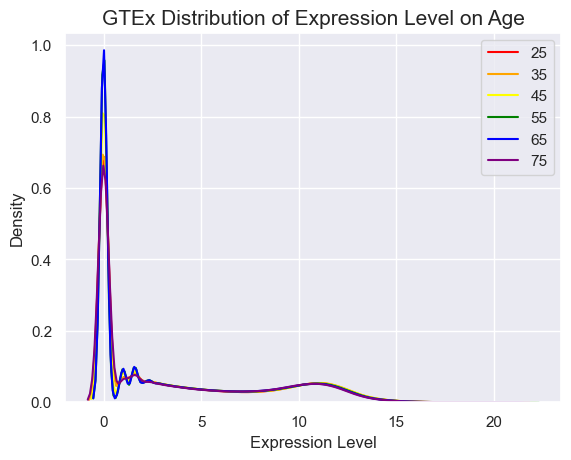

In [76]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
j = 0
for i in range(25, 85, 10):
    dj = np.array(df11_[df11_.AGE == i].iloc[:, :-2]).flatten()
    Age_GTE = sns.kdeplot(dj, color=colors[j], label=i);
    j += 1
Age_GTE.set_title('GTEx Distribution of Expression Level on Age', fontsize=15)
Age_GTE.set(xlabel='Expression Level', ylabel='Density')
plt.legend();
plt.show();

So there are no significant differences between genes distributions on Sex or Age in this dataset.

Finally, we add next 6 columns to have opportunity of joining the TCGA dataset.
We have 578 patients with genes expression level we will call *normal* because they didn't have cancel.
And we save GTEx dataset, which is ready to merge with TCGA, as csv file and also pickle object.

In [77]:
df11_['DATASET'] = 'GTEx'
df11_['SAMPLE'] = 'normal'
df11_['HISTOLOGY'] = 'normal'
df11_['LOCATION'] = 'other'
df11_['TIMESURV'] = 0.0
df11_['EVENTSURV'] = 'dead'
df11_

,5_8S_rRNA,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,...,ZZEF1,ZZZ3,SEX,AGE,DATASET,SAMPLE,HISTOLOGY,LOCATION,TIMESURV,EVENTSURV
GTEX-111CU,0.0,0.0000,0.0000,7.8948,6.8580,2.8074,18.5188,7.3309,4.5850,0.0,...,12.7239,10.9293,1,55,GTEx,normal,normal,other,0.0,dead
GTEX-111FC,0.0,0.0000,0.4308,8.0768,7.0334,4.0875,18.3952,8.9715,4.6439,1.0,...,12.0307,10.9024,1,65,GTEx,normal,normal,other,0.0,dead
GTEX-111VG,0.0,0.0000,0.0000,8.7814,7.5699,1.5850,19.5299,9.4838,6.1085,0.0,...,12.7121,10.0265,1,65,GTEx,normal,normal,other,0.0,dead
GTEX-111YS,0.0,0.0000,0.0000,8.0821,6.8202,2.0000,17.7859,7.2946,5.0444,0.0,...,12.9052,10.8114,1,65,GTEx,normal,normal,other,0.0,dead
GTEX-1122O,0.0,0.0000,0.0000,8.4553,7.4998,1.0000,18.0098,7.6935,5.1699,0.0,...,12.8844,10.4273,2,65,GTEx,normal,normal,other,0.0,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYVF,0.0,0.0000,0.4308,8.4676,7.9542,3.4594,19.0532,9.5736,5.7004,0.0,...,12.5294,10.9687,2,55,GTEx,normal,normal,other,0.0,dead
GTEX-ZYW4,0.0,0.0000,0.0000,8.1033,6.8074,3.4594,19.3598,9.6528,4.1699,0.0,...,12.8723,10.6733,1,65,GTEx,normal,normal,other,0.0,dead
GTEX-ZYY3,0.0,0.3333,0.0000,8.5887,6.3576,2.3219,18.9802,8.4553,4.8074,0.0,...,12.2411,10.1972,2,65,GTEx,normal,normal,other,0.0,dead
GTEX-ZZPT,0.0,0.3333,0.0000,8.9278,6.6724,2.8074,17.9545,8.5157,5.7814,0.0,...,12.5294,11.0782,1,55,GTEx,normal,normal,other,0.0,dead


In [16]:
df11_.to_pickle('L_Prep_df1')
df11_.to_csv('L_Prep_df1.csv')

# **TCGA dataset**

**Firstly**, we load the TCGA dataset with expression levels of genes and plot the distribution of all values.

In [17]:
df2 = pd.read_csv('Original_Data/TCGA_Lung.csv')
df2.shape # (20501, 1129)
df2.head()

,ID,TCGA-05-4244-01A,TCGA-05-4249-01A,TCGA-05-4250-01A,TCGA-05-4382-01A,TCGA-05-4384-01A,TCGA-05-4389-01A,TCGA-05-4390-01A,TCGA-05-4395-01A,TCGA-05-4396-01A,...,TCGA-NK-A5CX-01A,TCGA-NK-A5D1-01A,TCGA-NK-A7XE-01A,TCGA-O2-A52N-01A,TCGA-O2-A52Q-01A,TCGA-O2-A52S-01A,TCGA-O2-A52V-01A,TCGA-O2-A52W-01A,TCGA-O2-A5IB-01A,TCGA-XC-AA0X-01A
0,A1BG,4.75650,6.92047,5.69654,7.19873,7.00413,6.09045,7.37255,4.52196,4.20457,...,6.36857,6.84426,7.91327,8.37980,6.72747,7.06788,7.22695,5.74750,3.99350,5.74137
1,A1CF,0.00000,0.40272,0.00000,0.00000,0.00000,5.21884,0.00000,0.00000,4.08076,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.49968,0.88002,0.00000,0.34051,0.00000
2,A2BP1,1.45702,1.38394,0.00000,0.00000,0.00000,0.00000,6.62522,0.00000,0.00000,...,0.00000,4.01675,0.00000,0.62891,0.00000,0.00000,0.00000,0.00000,0.34051,0.00000
3,A2LD1,7.09278,6.49286,7.24919,6.82105,6.46882,6.81842,6.04322,7.50544,7.07230,...,5.84710,3.66341,7.34971,6.56545,6.52683,6.26107,6.45786,6.36631,5.47672,5.64684
4,A2ML1,0.43200,1.38394,0.00000,2.53259,0.00000,5.23179,0.71255,8.61415,0.81410,...,8.01532,0.66366,10.73034,6.39335,0.58207,2.76441,12.70388,14.00238,3.03360,12.44956


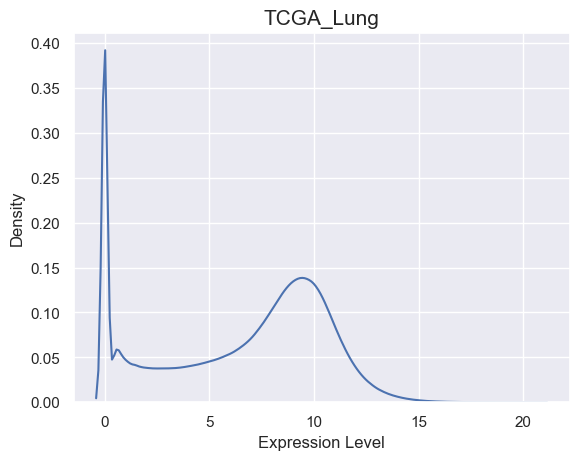

In [92]:
TCGA = sns.kdeplot(np.array(df2.iloc[:, 1:]).flatten(), legend=False)
TCGA.set_title('TCGA_Lung', fontsize=15)
TCGA.set(xlabel='Expression Level', ylabel='Density')
fig = TCGA.get_figure()
TCGA;

**Secondly**, we load the TCGA_samples dataset with information about patients, view the distributions of values in information columns and make some transformations with Age and Sex columns:
    1. Age: replace values with discrete values as in GTEx dataset;
    2. Sex: replace male -> 1, female -> 2.

In [22]:
df2_ = pd.read_csv('Original_Data/TCGA_samples.csv')
df2_.shape # (1128, 9)
df2_.tail(3)

,SAMPLEID,DATASET,SAMPLE,HISTOLOGY,LOCATION,SEX,AGE,TIMESURV,EVENTSURV
1125,TCGA-O2-A52W-01A,LUSC,tumor,lung squamous cell carcinoma,r-lower,male,63.0,261.0,dead
1126,TCGA-O2-A5IB-01A,LUSC,tumor,lung squamous cell carcinoma,r-middle,female,71.0,340.0,dead
1127,TCGA-XC-AA0X-01A,LUSC,tumor,lung squamous cell carcinoma,r-lower,female,77.0,6.0,dead


In [23]:
df2_.SAMPLE.value_counts() # tumor - 1018, normal - 110
df2_.EVENTSURV.value_counts() # alive - 772, dead - 322
df2_.SEX.value_counts() # male - 673, female - 455
df2_.DATASET.value_counts() # LUAD - 576, LUSC - 552
df2_.HISTOLOGY.value_counts()

HISTOLOGY
lung squamous cell carcinoma                     527
lung adenocarcinoma                              364
lung adenocarcinoma mixed subtype                113
lung papillary adenocarcinoma                     25
lung bronchioloalveolar carcinoma nonmucinous     22
lung acinar adenocarcinoma                        18
lung basaloid squamous cell carcinoma             17
mucinous (colloid) carcinoma                      13
lung papillary squamous cell caricnoma             6
lung bronchioloalveolar carcinoma mucinous         5
lung solid pattern predominant adenocarcinoma      5
lung mucinous adenocarcinoma                       4
lung clear cell adenocarcinoma                     3
lung micropapillary adenocarcinoma                 3
lung small cell squamous cell carcinoma            2
lung signet ring adenocarcinoma                    1
Name: count, dtype: int64

In [47]:
df2_.LOCATION.value_counts()

LOCATION
r-upper      357
l-upper      286
r-lower      226
l-lower      170
r-middle      45
other         15
bronchial     11
Name: count, dtype: int64

In [26]:
df2_.AGE = (df2_.AGE // 10) * 10 + 5
df2_.AGE = df2_.AGE.astype('Int64')
df2_.AGE.value_counts()

AGE
65    390
75    385
55    198
85     71
45     52
35      3
95      1
Name: count, dtype: Int64

In [27]:
df2_.SEX.replace({'male': 1, 'female': 2}, inplace=True)
df2_.SEX.value_counts() # male - 673, female - 455

SEX
1    673
2    455
Name: count, dtype: int64

Here we have two types of tumor: AC and SCC named LUAD and LUSC respectively (column 'DATASET')
    and a group of patients without tumor (normal in column 'SAMPLE').

**Thirdly**, we merge these two datasets for future investigations, check NAN and zero values.

In [28]:
df22_ = pd.concat([df2.set_index('ID').T, df2_.set_index('SAMPLEID')], axis=1, join="inner")
df22_.tail() # (1128, 20509)

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,psiTPTE22,tAKR,DATASET,SAMPLE,HISTOLOGY,LOCATION,SEX,AGE,TIMESURV,EVENTSURV
TCGA-O2-A52S-01A,7.06788,0.49968,0.00000,6.26107,2.76441,11.82613,8.58445,0.49968,0.49968,10.10482,...,2.67374,1.16459,LUSC,tumor,lung squamous cell carcinoma,l-lower,2,55,387.0,dead
TCGA-O2-A52V-01A,7.22695,0.88002,0.00000,6.45786,12.70388,12.40062,10.21648,3.09825,0.00000,9.69710,...,1.63278,0.00000,LUSC,tumor,lung squamous cell carcinoma,l-upper,2,75,1335.0,dead
TCGA-O2-A52W-01A,5.74750,0.00000,0.00000,6.36631,14.00238,12.37181,12.41451,0.62040,0.62040,9.55499,...,3.73973,0.00000,LUSC,tumor,lung squamous cell carcinoma,r-lower,1,65,261.0,dead
TCGA-O2-A5IB-01A,3.99350,0.34051,0.34051,5.47672,3.03360,14.01294,4.80169,1.22107,0.00000,9.46625,...,1.04614,0.00000,LUSC,tumor,lung squamous cell carcinoma,r-middle,2,75,340.0,dead
TCGA-XC-AA0X-01A,5.74137,0.00000,0.00000,5.64684,12.44956,13.84406,11.32299,3.37793,1.35952,9.27144,...,8.84986,0.00000,LUSC,tumor,lung squamous cell carcinoma,r-lower,2,75,6.0,dead


In [48]:
df22_.iloc[:, :-6].isna().any().sum() # 0

0

In [29]:
TCGA_columns_with_all_zeros = df22_.columns[(df22_ == 0.0).all()].tolist()
len(TCGA_columns_with_all_zeros) # 270

270

In [52]:
columns_with_all_zeros = set(TCGA_columns_with_all_zeros) & set(GTEx_columns_with_all_zeros)
len(columns_with_all_zeros) # 55

55

So, we have found that only 55 columns have all zero values in both GTEx and TCGA, and we can remove these features quietly.
    But we have 270-55=215 features which have zeros in TCGA and not zeros in GTEx and 1845-55=1790 features which have zeros in GTEx but not in TCGA. We remember this fact for further investigation.

#### Research of differences between genes distributions on Sex

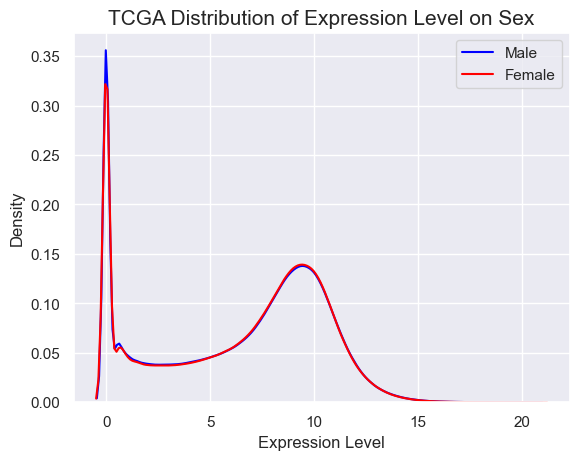

In [54]:
colors = ['blue', 'red']
sexes = ['Male', 'Female']
for sex in [1, 2]:
    dj = np.array(df22_[df22_.SEX == sex].iloc[:, :-8]).flatten()
    Sex_TCGA = sns.kdeplot(dj, color=colors[sex-1], label=sexes[sex-1]);
Sex_TCGA.set_title('TCGA Distribution of Expression Level on Sex', fontsize=15)
Sex_TCGA.set(xlabel='Expression Level', ylabel='Density')
plt.legend();
plt.show();

#### Research of differences between genes distributions on Age

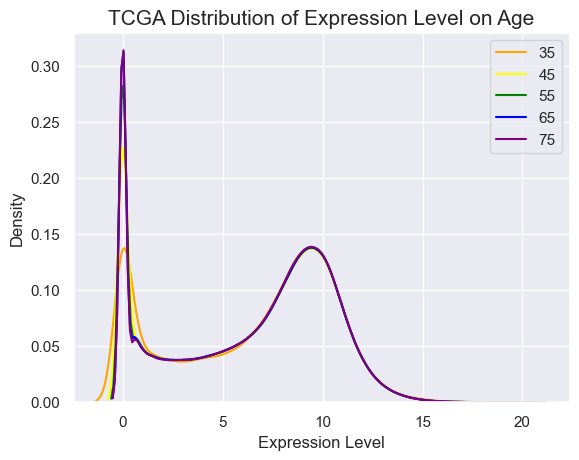

In [78]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
j = 0
for i in range(25, 85, 10):
    dj = np.array(df22_[df22_.AGE == i].iloc[:, :-8]).flatten()
    Age_TCGA = sns.kdeplot(dj, color=colors[j], label=i);
    j += 1
Age_TCGA.set_title('TCGA Distribution of Expression Level on Age', fontsize=15)
Age_TCGA.set(xlabel='Expression Level', ylabel='Density')
plt.legend();
plt.show();

So, we have the same results as for GTEx.

Finally, we save TCGA dataset, which is ready to merge with GTEx, as csv file and also pickle object.

In [56]:
df22_.to_pickle('L_Prep_df2')
df22_.to_csv('L_Prep_df2.csv')

# **Final GTEx+TCGA dataset**

Now we merge data from two sources on common genes and receive the dataset with 1706 patients (rows) and 17810 genes (8 info cols).

In [70]:
df3 = pd.concat([df11_.T, df22_.T], axis=1, join="inner") # (17818, 1706)
df3 = df3.T
df3.tail() # (1706, 17818)

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZZEF1,ZZZ3,SEX,AGE,DATASET,SAMPLE,HISTOLOGY,LOCATION,TIMESURV,EVENTSURV
TCGA-O2-A52S-01A,7.06788,0.49968,11.82613,2.76441,8.58445,0.49968,10.10482,9.4692,4.98318,1.618,...,10.06412,9.61492,2,55,LUSC,tumor,lung squamous cell carcinoma,l-lower,387.0,dead
TCGA-O2-A52V-01A,7.22695,0.88002,12.40062,12.70388,10.21648,3.09825,9.6971,9.51686,6.05643,0.50609,...,9.37707,9.60669,2,75,LUSC,tumor,lung squamous cell carcinoma,l-upper,1335.0,dead
TCGA-O2-A52W-01A,5.7475,0.0,12.37181,14.00238,12.41451,0.6204,9.55499,10.00695,8.89486,3.26266,...,9.51423,9.57546,1,65,LUSC,tumor,lung squamous cell carcinoma,r-lower,261.0,dead
TCGA-O2-A5IB-01A,3.9935,0.34051,14.01294,3.0336,4.80169,1.22107,9.46625,10.47983,1.51788,0.0,...,9.70448,10.43475,2,75,LUSC,tumor,lung squamous cell carcinoma,r-middle,340.0,dead
TCGA-XC-AA0X-01A,5.74137,0.0,13.84406,12.44956,11.32299,3.37793,9.27144,10.45329,7.47536,6.66138,...,10.56189,9.34624,2,75,LUSC,tumor,lung squamous cell carcinoma,r-lower,6.0,dead


Create a new feature 'STATE' which contains useful information from 2 cols and drop these cols.

In [71]:
df3['STATE'] = df3.DATASET.replace({'LUAD': 'AC', 'LUSC': 'SCC'}) + '_' + df3.SAMPLE
df3 = df3.drop(['DATASET', 'SAMPLE'], axis=1) # (1706, 17817)
df3.STATE.value_counts()

STATE
GTEx_normal    578
AC_tumor       517
SCC_tumor      501
AC_normal       59
SCC_normal      51
Name: count, dtype: int64

In [73]:
df3.STATE.value_counts().index

Index(['GTEx_normal', 'AC_tumor', 'SCC_tumor', 'AC_normal', 'SCC_normal'], dtype='object', name='STATE')

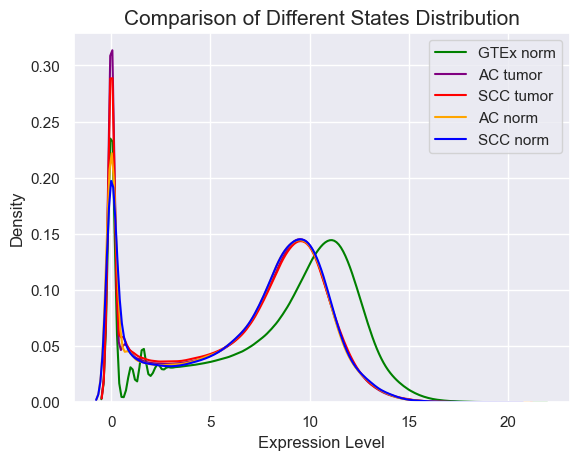

In [80]:
colors = ['green', 'purple', 'red', 'orange', 'blue']
states = ['GTEx norm', 'AC tumor', 'SCC tumor', 'AC norm', 'SCC norm']
j = 0
for state in df3.STATE.value_counts().index:
    dj = np.array(df3[df3.STATE == state].iloc[:, :-8]).flatten()
    States_initial = sns.kdeplot(dj, color=colors[j], label=states[j]);
    j += 1
States_initial.set_title('Comparison of Different States Distribution', fontsize=15)
States_initial.set(xlabel='Expression Level', ylabel='Density')
plt.legend();
fig = States_initial.get_figure()
fig.savefig('Compare_States_df3.svg', format='svg')
plt.show();

As we see data from different sources are shifted. And our proposal is that it's because of various laboratory methods of genes investigation.
So we decided to transform our GTEx data to shift them to become as normal in TCGA.

In [81]:
norm_GTEx = df3[df3.STATE == 'GTEx_normal']
norm_TCGA = df3[(df3.STATE == 'AC_normal') | (df3.STATE == 'SCC_normal')]
for col in norm_GTEx.columns[:17810]:
    col_mean, col_std = norm_GTEx[col].mean(), norm_GTEx[col].std()
    dg_col_mean, dg_col_std = norm_TCGA[col].mean(), norm_TCGA[col].std()
    norm_GTEx[col] = (norm_GTEx[col] - col_mean) * (dg_col_std / col_std) + dg_col_mean
# We have Warnings while executing this code mainly because we have cols with all zeros and Python swears and as a result we'll have NA values...

C:\Users\Cortez\AppData\Local\Temp\ipykernel_3820\2344456700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_GTEx[col] = (norm_GTEx[col] - col_mean) * (dg_col_std / col_std) + dg_col_mean
C:\Users\Cortez\AppData\Local\Temp\ipykernel_3820\2344456700.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  norm_GTEx[col] = (norm_GTEx[col] - col_mean) * (dg_col_std / col_std) + dg_col_mean
C:\Users\Cortez\AppData\Local\Temp\ipykernel_3820\2344456700.py:6: RuntimeWarning: invalid value encountered in double_scalars
  norm_GTEx[col] = (norm_GTEx[col] - col_mean) * (dg_col_std / col_std) + dg_col_mean


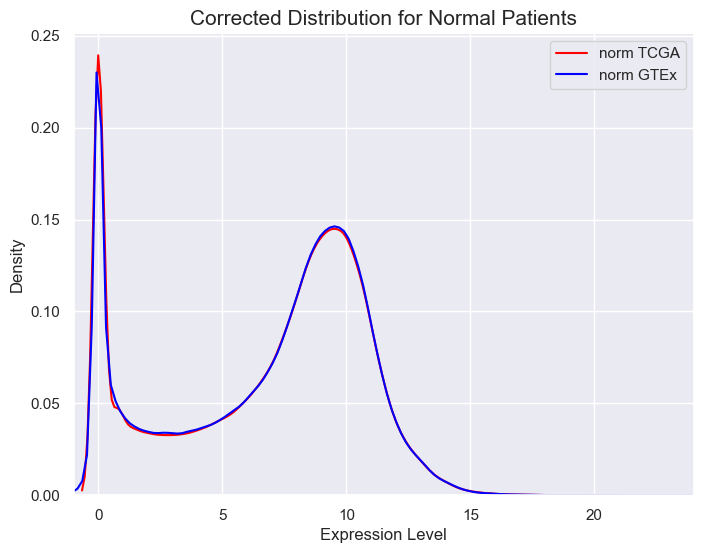

In [82]:
fig, axs = plt.subplots(figsize=(8, 6))
sns.kdeplot(np.array(norm_TCGA.iloc[:, :17810]).flatten(), color='red', label='norm TCGA', ax=axs);
sns.kdeplot(np.array(norm_GTEx.iloc[:, :17810]).flatten(), color='blue', label='norm GTEx', ax=axs);
axs.set(xlim=(-1, 24), xlabel='Expression Level')
axs.set_title("Corrected Distribution for Normal Patients", fontsize=15)
plt.legend();
fig.savefig('Corrected_Distribution_Normal.svg', format='svg')
plt.show();

Now all values from our two sources have the same distribution, and we have to replace NA values by zero because they were zero before transformations.

In [85]:
norm_GTEx = pd.concat([norm_GTEx.iloc[:, :-7].fillna(0), norm_GTEx.iloc[:, -7:]], axis=1)
norm_GTEx.iloc[:, :-7].isna().sum().sum() # 0

0

We create new dataset with corrected values and plot distributions to compare initial and corrected, and states in final corrected dataset, also we remove all genes with only zeros values and save final corrected dataset.

In [98]:
df4 = pd.concat([norm_GTEx, df3[df3.STATE != 'GTEx_normal']]) # (1706, 17817)
df4.shape # (1706, 17817)

(1706, 17817)

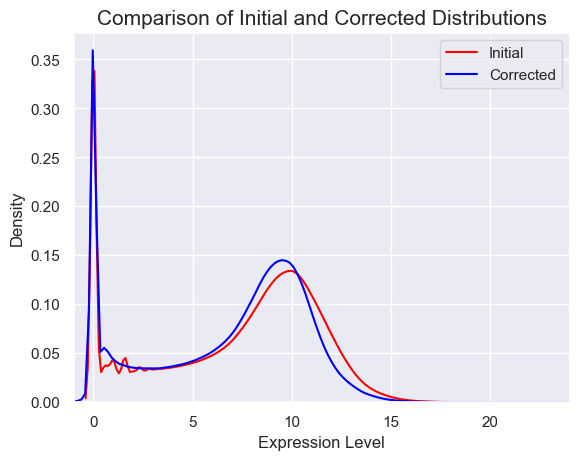

In [90]:
fig, axs = plt.subplots()
sns.kdeplot(np.array(df3.iloc[:, :17810]).flatten(), color='red', label='Initial');
sns.kdeplot(np.array(df4.iloc[:, :17810]).flatten(), color='blue', label='Corrected');
axs.set(xlim=(-1, 24), xlabel='Expression Level')
axs.set_title("Comparison of Initial and Corrected Distributions", fontsize=15)
plt.legend();
fig.savefig('Distributions_Initial_Corrected.svg', format='svg')
plt.show();

In [99]:
df4.STATE = df4.STATE.replace({'GTEx_normal': 'norm', 'AC_tumor': 'AC', 'SCC_tumor': 'SCC', 'AC_normal': 'norm', 'SCC_normal': 'norm'})
df4.STATE.value_counts() # 688 = 578+110 - norm (from GTEx, LUAD, LUSC), 517 = 576-59 -> AC (from LUAD), 501 = 552-51 -> SCC(from LUSC)

STATE
norm    688
AC      517
SCC     501
Name: count, dtype: int64

In [100]:
df4_columns_with_all_zeros = df4.columns[(df4 == 0.0).all()].tolist()
len(df4_columns_with_all_zeros) # 217

217

In [101]:
df4 = df4.drop(df4.columns[(df4 == 0.0).all()].tolist(), axis=1) # (1706, 17600)

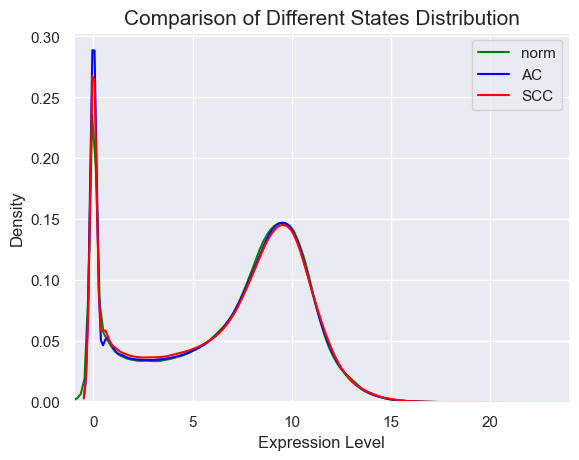

In [96]:
fig, axs = plt.subplots()
sns.kdeplot(np.array(df4[df4.STATE == 'norm'].iloc[:, :-7]).flatten(), color='green', label='norm');
sns.kdeplot(np.array(df4[df4.STATE == 'AC'].iloc[:, :-7]).flatten(), color='blue', label='AC');
sns.kdeplot(np.array(df4[df4.STATE == 'SCC'].iloc[:, :-7]).flatten(), color='red', label='SCC');
axs.set(xlim=(-1, 24), xlabel='Expression Level')
axs.set_title("Comparison of Different States Distribution", fontsize=15)
plt.legend();
fig.savefig('Comparison_States_Distribution_Corrected.svg', format='svg')
plt.show();

In [102]:
df4.to_pickle('L_Prep_df4')
df4.to_csv('L_Prep_df4.csv')

For the State investigation we need only 1 info col - State. So we save pickle object with shape (1706, 17594).

In [7]:
df5 = df4.drop(df4.columns[-7:-1], axis=1) # (1706, 17594)
df5.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,STATE
GTEX-111CU,6.282829,0.187227,16.459309,1.390586,9.284774,1.817905,8.861321,9.356633,7.162157,0.405928,...,6.519220,5.774152,8.752136,10.276568,0.395912,9.567469,13.064981,10.710016,9.178765,norm
GTEX-111FC,6.459492,0.386816,16.357314,1.462766,8.363233,2.132000,9.006019,8.859413,6.869540,0.912104,...,6.302100,5.820590,8.343859,10.116765,0.997971,9.816011,12.760873,10.042366,9.167625,norm
GTEX-111VG,7.143432,-0.003366,17.293667,3.257567,9.789358,1.989310,9.090267,9.029279,6.511335,2.000838,...,5.736464,5.852467,8.692399,9.894538,1.543979,9.809940,13.636654,10.698651,8.804904,norm
GTEX-111YS,6.464637,0.061339,15.854521,1.953561,8.419853,1.315828,8.923156,9.249810,9.213866,0.004093,...,6.219143,5.812366,8.676940,10.376354,0.589715,10.132188,12.351264,10.884633,9.129941,norm
GTEX-1122O,6.826894,-0.094578,16.039283,2.107355,8.505655,2.619394,9.076225,9.249061,8.817053,-0.682806,...,6.624728,5.650416,8.575410,10.407757,1.191774,9.888598,12.661172,10.864600,8.970880,norm


In [8]:
#df5.to_pickle('L_Prep_State')
df5.to_csv('L_Prep_State.csv')